# Use the `ws3` optimization funtions to find maximum even-flow harvest volume

The `ws3` package provides functions for formulating and solving optmization problems. In this notebook we will use these functions to 
formulate and solve a maximum even-flow harvest volume problem. 

Below we (optionally) install the `ws3` package from the local source code in this repository using the `-e` flag to ensure that the package is installed in editable mode (i.e., any changes you make to the source code immediately affect `ws3` behaviour the next time you run the notebook). This is is not necessary if you have installed `ws3` using pip or another method.

```
# this is a markdown cell, not a code cell.
clobber_ws3 = True
if clobber_ws3:
    %pip uninstall -y ws3
    %pip install -e ..
```

Set auto-reload to reload modules when they are changed.

In [3]:
%load_ext autoreload
%autoreload 2

Import the `ws3` package, and import a function from the local `util` module to generate and run scenarios. We also import `matplotlib`, which is used for visualisation.

In [4]:
import matplotlib.pyplot as plt
import ws3
import ws3.forest
from util import run_scenario

Set some reasonable model parameters.

In [5]:
base_year = 2020
horizon = 10
period_length = 10
max_age = 1000
n_steps = 100
tvy_name = 'totvol'    

Create a new `ForestModel` object and import a model dataset from the `data` directory.

In [6]:
fm = ws3.forest.ForestModel(model_name='tsa24_clipped',
                            model_path='data/woodstock_model_files',
                            base_year=base_year,
                            horizon=horizon,
                            period_length=period_length,
                            max_age=max_age)
fm.import_landscape_section()
fm.import_areas_section()
fm.import_yields_section()
fm.import_actions_section()
fm.import_transitions_section()
fm.initialize_areas()
fm.add_null_action()
fm.reset_actions()

fm.actions['harvest'].is_harvest = True # set harvest action to be a harvest action (needed for `cmp_c_z` to work correctly)

Use the `run_scenario` function (defined in the local `util` module) to formulate and solve various flavours of pre-defined scenarios. If only provided with an `fm` instance as an argument, the function will run the `base` scenario, which maximizes even-flow harvest volume. The default PuLP solver will be used unless otherwise specified.

running base scenario
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gep/projects/ws3/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/10e032d1c4354ccc96afe4d5618b467e-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/10e032d1c4354ccc96afe4d5618b467e-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 77 COLUMNS
At line 3776 RHS
At line 3849 BOUNDS
At line 4155 ENDATA
Problem MODEL has 72 rows, 305 columns and 3425 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 60 (-12) rows, 273 (-32) columns and 3177 (-248) elements
0  Obj -0 Dual inf 2157186.5 (273)
31  Obj 356474.73 Primal inf 656.98798 (31)
62  Obj 209236.84 Primal inf 115.74605 (25)
96  Obj 196675.93 Primal inf 32.967855 (17)
127  Obj 193916.47 Primal inf 1.388767 (7)
137  Obj 193807.07
Optimal - objective value 193807.07
After Postsolve, objective 1

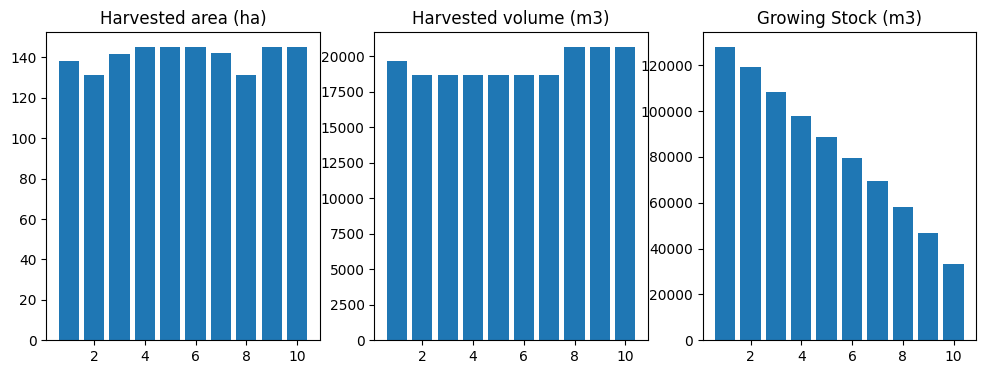

In [7]:
fig, df, p = run_scenario(fm)

Run the same scenario using the Gurobi solver. The results should be identical to the he previous scenario (run using default PuLP solver).

running base scenario
Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 24.04.1 LTS")

CPU model: Intel(R) Xeon(R) Gold 6254 CPU @ 3.10GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 36 physical cores, 72 logical processors, using up to 32 threads

Optimize a model with 72 rows, 305 columns and 3425 nonzeros
Model fingerprint: 0x82387814
Coefficient statistics:
  Matrix range     [3e-02, 4e+04]
  Objective range  [2e+01, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 12 rows and 32 columns
Presolve time: 0.01s
Presolved: 60 rows, 273 columns, 3177 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2455285e+05   1.160851e+04   0.000000e+00      0s
      90    1.9380707e+05   0.000000e+00   0.000000e+00      0s

Solved in 90 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.938070735e+05


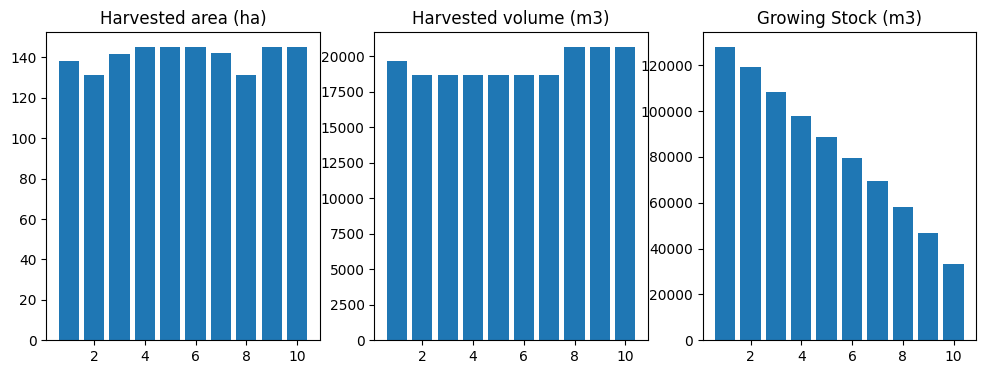

In [8]:
fig, df, p = run_scenario(fm, solver='gurobi')


RunRun the ``base-cgen_ha`` scenario, which maximizes even-flow harvest volume plus adds a maximum (100 ha) harvest area constraint on period 1.

running base scenario plus harvest area constraints
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gep/projects/ws3/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/7b335ccb26b44c72b9f9b59b54920dec-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/7b335ccb26b44c72b9f9b59b54920dec-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 79 COLUMNS
At line 3886 RHS
At line 3961 BOUNDS
At line 4267 ENDATA
Problem MODEL has 74 rows, 305 columns and 3533 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 61 (-13) rows, 273 (-32) columns and 3231 (-302) elements
0  Obj -0 Dual inf 2157186.5 (273)
31  Obj 212800.62 Primal inf 281.64218 (38)
73  Obj 165765.24 Primal inf 79.540579 (27)
111  Obj 155054.76 Primal inf 43.66194 (20)
145  Obj 149451.32 Primal inf 3.2246225 (14)
164  Obj 149214.57
Optimal - objective value 149214

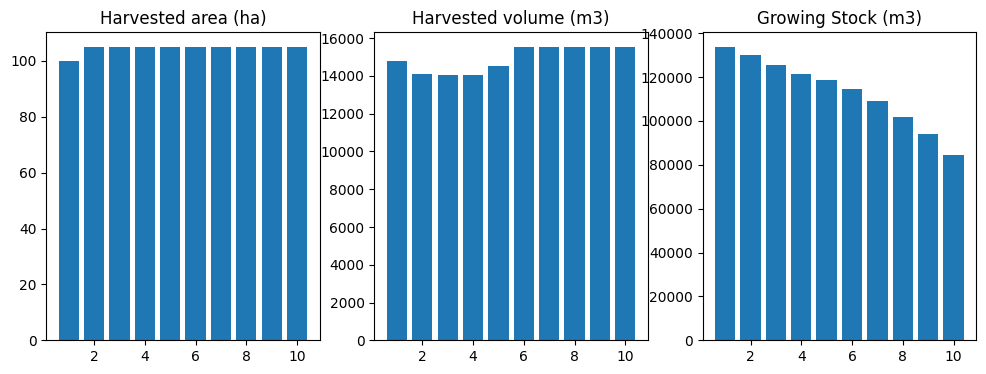

In [9]:
fig, df, p = run_scenario(fm, scenario_name='base-cgen_ha')

Next, we run the ``basease-cgen_hv`` scenario, which maximizes even-flow harvest volume plus adds a maximum harvest volume (10 000 $m^3$ per 10-year period) constraint on period 1..

running base scenario plus harvest volume constraints
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gep/projects/ws3/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/b8aa7d8c51bc44c8a49dd0843c76a6eb-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/b8aa7d8c51bc44c8a49dd0843c76a6eb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 79 COLUMNS
At line 3886 RHS
At line 3961 BOUNDS
At line 4267 ENDATA
Problem MODEL has 74 rows, 305 columns and 3533 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 61 (-13) rows, 273 (-32) columns and 3231 (-302) elements
0  Obj -0 Dual inf 2157186.5 (273)
36  Obj 316184.44 Primal inf 925.05748 (42)
76  Obj 137586.5 Primal inf 389.33116 (41)
115  Obj 104500 Primal inf 150.73498 (36)
156  Obj 104500 Primal inf 62.441917 (34)
194  Obj 104500 Primal inf 5.5609813 (16)
225  Obj 1045

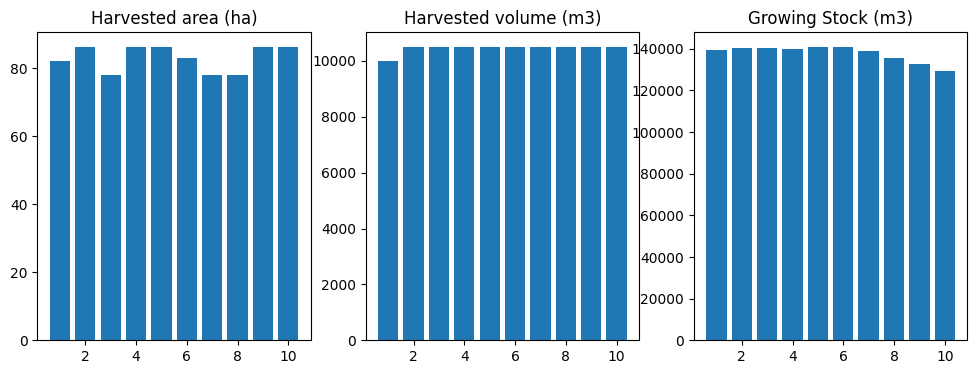

In [11]:
problem = run_scenario(fm, scenario_name='base-cgen_hv')

Next, we run the ``basease-cgen_gs`` scenario, which maximizes even-flow harvest volume plus adds a minimum growning stock volume (120 000 $m^3$) constraint on period 10.

running base scenario plus growing stock constraints
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/gep/projects/ws3/.venv/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/af4575c955bd45aea264d34445452040-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/af4575c955bd45aea264d34445452040-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 79 COLUMNS
At line 4058 RHS
At line 4133 BOUNDS
At line 4439 ENDATA
Problem MODEL has 74 rows, 305 columns and 3705 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 61 (-13) rows, 297 (-8) columns and 3333 (-372) elements
0  Obj -0 Primal inf 372.31174 (25) Dual inf 1935681.4 (273)
31  Obj 583100.88 Primal inf 628.03243 (35)
62  Obj 158492.29 Primal inf 294.74085 (32)
93  Obj 127973.16 Primal inf 40.169321 (20)
124  Obj 126660.79 Primal inf 12.325624 (14)
153  Obj 126213.83
Optima

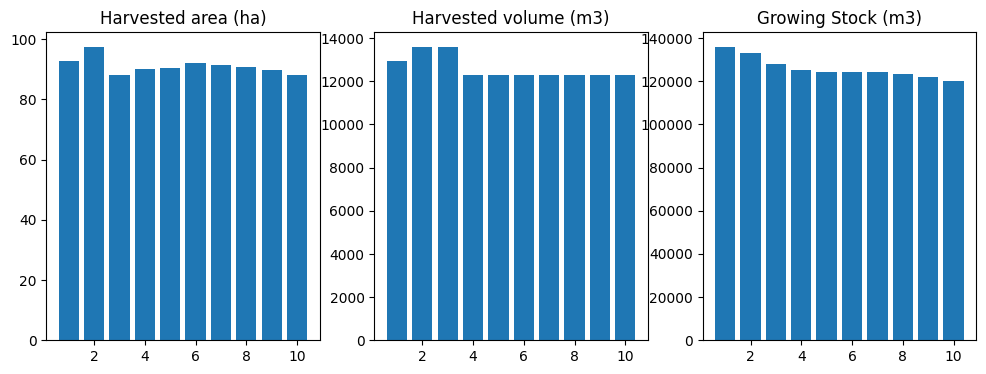

In [13]:
problem = run_scenario(fm, scenario_name='base-cgen_gs')